In [1]:
from audio_tools import *
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.simplefilter(action='ignore')


In [2]:
GEN_FILENAME = 'samples/output'

## Play and inspect an audio file

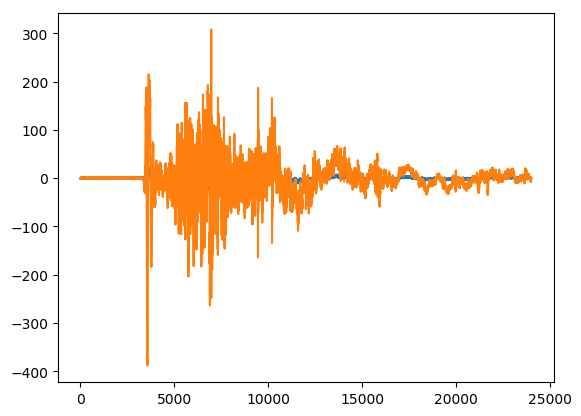

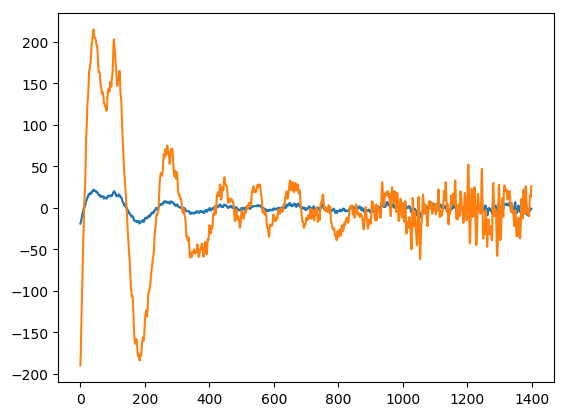

In [3]:
FILENAME = GEN_FILENAME+"142.wav"

play_wav(FILENAME)

np_sound_ch1 = wav_to_np(outfile = FILENAME)[0]
np_sound_ch2 = wav_to_np(outfile = FILENAME)[1]

plt.plot(np_sound_ch1)
plt.plot(np_sound_ch2)
plt.show()

plt.plot(np_sound_ch1[3600:5000])
plt.plot(np_sound_ch2[3600:5000])
plt.show()

## Correlations between Intensity discrepencies and angles

In [4]:
vec1, vec2  = [], []
deg = []

for j in range(200):
    # comparing
    audio_signals = wav_to_np(GEN_FILENAME + str(j+1) + ".wav")
    
    a = np.copy(audio_signals[0]).reshape(-1)[3600:4000]
    b = np.copy(audio_signals[1]).reshape(-1)[3600:4000]

    vec1.append((np.mean(np.abs(b))-np.mean(np.abs(a)))/(np.mean(np.abs(b))+np.mean(np.abs(a))))
    
    mask = [np.abs(a)+np.abs(b)!=0]
    b, a = b[mask], a[mask]
    vec2.append((np.mean((np.abs(b)-np.abs(a))/(np.abs(b)+np.abs(a)))))

    #degrees
    with open('samples/output.txt') as f:
        lines = f.readlines()
        deg.append(float(lines[j].split(':')[-1]))

deg =(np.array(deg)* np.pi / 180)
vec1 = np.array(vec1)

print('Correlation between vec1 and deg: ', np.corrcoef([np.sin(deg), vec1])[0, 1])
print('Correlation between vec2 and deg: ', np.corrcoef([np.sin(deg), vec2])[0, 1])

Correlation between vec1 and deg:  0.923890697178937
Correlation between vec2 and deg:  0.9033505977659251


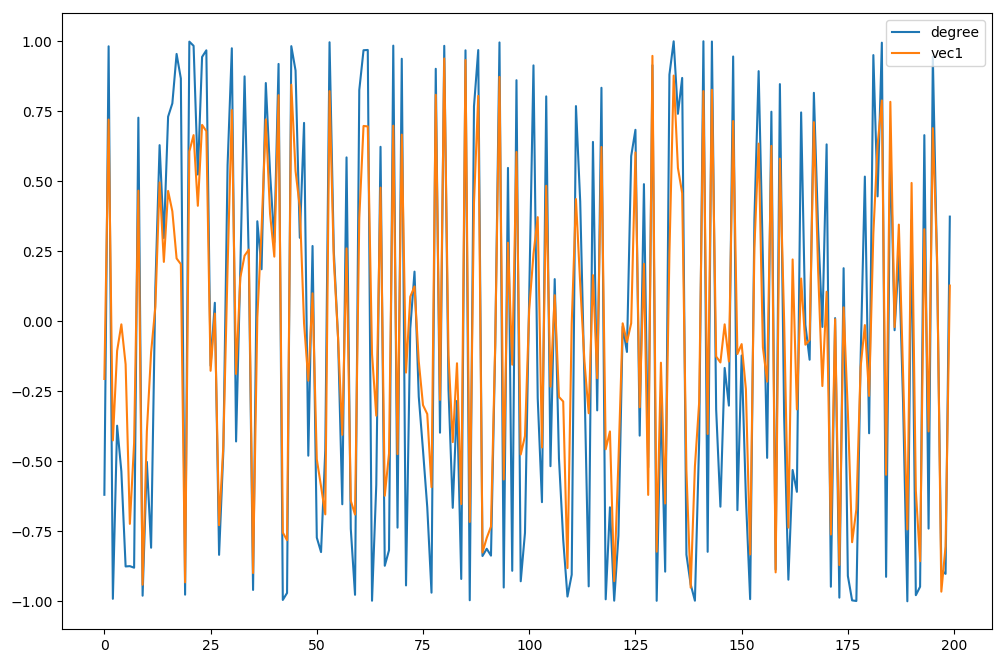

In [5]:
plt.figure(figsize=(12,8))
plt.plot(np.sin(deg), label='degree')
plt.plot(vec1, label='vec1')
plt.legend()
plt.show()

## Fourier

In [172]:
FILENAME = "samples3/test3.wav"

play_wav(FILENAME)

np_sound_ch1 = wav_to_np(outfile = FILENAME)[0]
np_sound_ch2 = wav_to_np(outfile = FILENAME)[1]

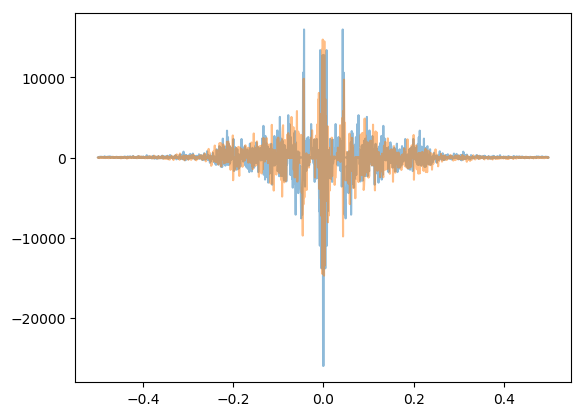

In [173]:
def fourier(aa, pl=True):
    sp = np.fft.fft(aa)
    freq = np.fft.fftfreq(aa.shape[-1])
    if pl:
        plt.plot(freq, sp.real, freq, sp.imag, alpha=.5)
        plt.show()
    return sp

fourier(np_sound_ch1[3600:5000]);

In [359]:
def _filter(data1, data2, bandlimit: int =3000, sampling_rate: int = 44100) -> np.ndarray:

    bandlimit_index = int(bandlimit * data1.size / sampling_rate)
    fsig1 = np.fft.fft(data1)
    
    bandlimit_index = int(bandlimit * data2.size / sampling_rate)
    fsig2 = np.fft.fft(data2)
    
    mask = np.abs(fsig1-fsig2)<=100

    fsig1[mask]=0
    fsig2[mask]=0
    
    fsig1[fsig1<150]=0
    fsig2[fsig2<150]=0
    
    fsig1[bandlimit_index + 1: len(fsig1) - bandlimit_index] = 0
    fsig2[bandlimit_index + 1: len(fsig2) - bandlimit_index] = 0
    
    
    data1_filtered = np.fft.ifft(fsig1)
    data2_filtered = np.fft.ifft(fsig2)
    
    data1_filtered[np.abs(data1_filtered)<150]=0
    
    
    return np.real(data1_filtered), np.real(data2_filtered)

In [360]:
res1, res2 = _filter(np_sound_ch1, np_sound_ch2)

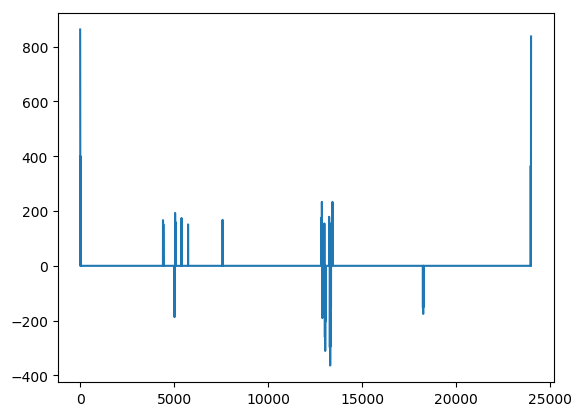

In [361]:
#plt.plot(np_sound_ch1)
plt.plot(res1)

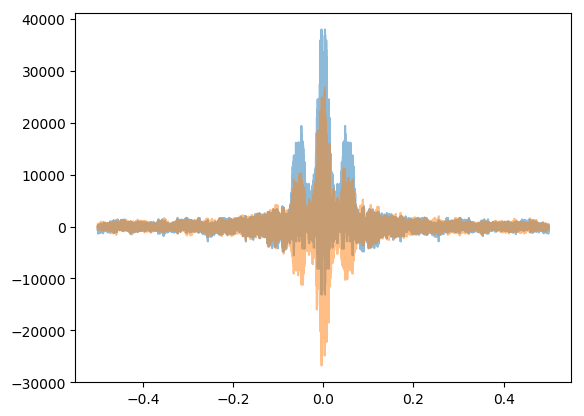

In [362]:
fourier(res1);

In [363]:
import numpy as np
from scipy.io.wavfile import write

rate = 44100
scaled = np.int16(res1 / np.max(np.abs(res1)) * 32767)
write('test.wav', rate, scaled)

In [366]:
play_wav(FILENAME)
play_wav('test.wav')

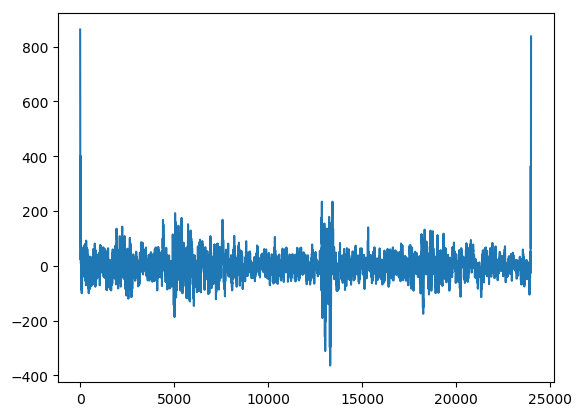

In [349]:
plt.plot(res1)